In [1]:
import csv
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt

skillset_data = pd.read_csv('skillset_data.csv')
skillset_data = skillset_data.drop(['Unnamed: 0'], 1)

In [2]:
skillset_data.head()

,Skills
0,microsoft office
1,management
2,customer service
3,microsoft excel
4,leadership


In [3]:
company_names = ['Google', 'Facebook', 'Amazon', 'Netflix', 'Microsoft', 'Apple']

## Beginning to read the Bay Area Data

In [4]:
#Start loading the Bay Area Data
fileloc = 'selected_companies.csv'
selected = pd.read_csv(fileloc)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#Data from the selected companies from a selected time period
selected

,Unnamed: 0,Start date,Flag: Is the start month valid?,End date,Flag: Is the end month valid?,Flag: Is this their current employment?,Length of stay,Role,Department,Company name,Normalized company name,Normalized role,Start year,End year
0,111,2007-02-01,True,2010-05-01,True,False,1185.0,"UX Design Lead,design,lead","MARKETING,TECHNOLOGY",Google,Google,ux design lead,2007,2010
1,113,2014-08-01,True,2017-07-01,True,False,1065.0,"Design Manager,design manager",MARKETING,Google,Google,design manager,2014,2017
2,340,2017-06-01,True,2017-08-01,True,False,61.0,"BOLD Intern,intern",NaN,Google,Google,bold intern,2017,2017
3,341,2018-07-01,True,None,False,True,192.0,"New Business Account Executive,account executi...",MARKETING,Google,Google,new business account executive,2018,0
4,542,2017-05-01,True,2017-08-01,True,False,92.0,"Software Engineering Intern,software,engineeri...",TECHNOLOGY,Google,Google,software engineering intern,2017,2017
5,633,2016-05-01,True,2016-09-01,True,False,123.0,"Software Engineering Intern,software,engineeri...",TECHNOLOGY,Google,Google,software engineering intern,2016,2016
6,714,2016-10-01,True,2017-04-01,True,False,182.0,"Senior Algorithm Engineer,senior,engineer",NaN,Google,Google,senior algorithm engineer,2016,2017
7,716,2017-06-01,True,None,False,True,587.0,"Senior Engineer,senior engineer",NaN,Google,Google,senior engineer,2017,0
8,764,2013-02-01,True,None,False,True,2168.0,"Software Engineer,software engineer",TECHNOLOGY,Google,Google,software engineer,2013,0
9,923,2010-05-01,True,2010-09-01,True,False,123.0,"Marketing Sourcer,marketing",MARKETING,Google,Google,marketing sourcer,2010,2010


In [6]:
#Get row data based on a specific year and company name.
def get_year_data(year, company):
    role = pd.DataFrame(columns = ['Normalized role'])
    for index, row in selected.iterrows():
        if row['Company name'] == company:
            if year >= row['Start year'] and (year <= row['End year'] or row['End year'] == 0):
                role = role.append({'Normalized role': row['Normalized role']}, ignore_index=True)
    return role

### Here we reprocess the annotated skillset data

In [7]:
annotated = pd.read_csv('anno_skills_top_1000.csv')
annotated = annotated.drop(['Unnamed: 0'], 1)

In [8]:
annotated.head()

,Skills
0,microsoft office
1,microsoft excel
2,microsoft word
3,powerpoint
4,social media


In [9]:
#Get a matching
#TODO: Solve tokenization problem: e.g. machine learning cannot be searched
def get_matches(company = 'Google', year = 2017):
    matches = pd.DataFrame()
    job_data = get_year_data(year, company)
    for index, row in annotated.iterrows():
        temp = job_data[job_data['Normalized role'].map(lambda x: row['Skills'] in str(x).split())]
        temp['Skills'] = row['Skills']
        matches = matches.append(temp)
    return matches

In [10]:
#Saves requested data locally for later use
def save_data(comp = 'Google', start = 2008, end = 2018):
    for i in range(start, end + 1):
        temp = get_matches(company = comp, year = i)
        temp.to_csv('{}_{}_{}/{}_{}.csv'.format(comp, start, end, comp, i))
    return

In [11]:
#Saving all data locally
#Uncomment this method in the first run
#for i in company_names:
#        save_data(comp = i, start = 2008, end = 2018)

In [12]:
#MAIN METHOD
def search_and_plot(keyword = 'android', comp = 'Google'):
    temp = pd.DataFrame()
    skilllist = pd.DataFrame()
    years = []
    for i in range(2008, 2019):
        read = pd.read_csv('{}_2008_2018/{}_{}.csv'.format(comp, comp, i))
        df = pd.DataFrame(read['Skills'].value_counts().rename_axis('skills').reset_index(name='counts'))
        skilllist = skilllist.append(df)
        if df.loc[df['skills'] == keyword].size == 0:
            continue
        else:
            temp = temp.append(df.loc[df['skills'] == keyword])
            years.append(i)
    temp['year'] = years
    temp = temp.set_index('year')
    if temp.empty:
        print('The requested keyword cannot be found in job titles from %s data!' % comp)
        print('Please search from this list: ')
        print(skilllist.skills.unique())
        return
    else:
        temp.plot()
    return temp

# Main function: search_and_plot() 
### The function returns the skill frequency table from a company and a diagram.
#### Parameters:

- comp: the company requested, from the list \['Google', 'Facebook', 'Amazon', 'Netflix', 'Microsoft', 'Apple'\]
    - default: 'Google'
- keyword: the skill/technology requested, from the dataframe 'annotated'
    - default: 'android'

,skills,counts
year,,
2008,android,42
2009,android,58
2010,android,96
2011,android,137
2012,android,174
2013,android,231
2014,android,285
2015,android,319
2016,android,337


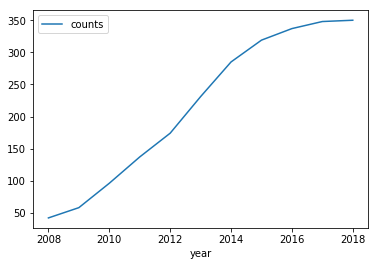

In [13]:
#Example 1: default value
search_and_plot()

,skills,counts
year,,
2011,ip,1
2012,ip,2
2013,ip,2
2014,ip,3
2015,ip,4
2016,ip,7
2017,ip,17
2018,ip,22


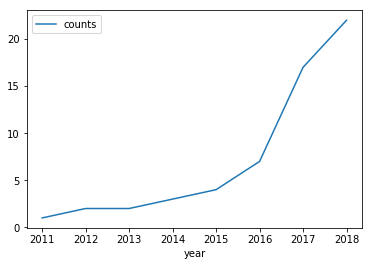

In [14]:
#Example 2: Facebook's usage of ip-related technologies
search_and_plot(comp = 'Facebook', keyword = 'ip')

,skills,counts
year,,
2010,android,1
2011,android,3
2012,android,4
2013,android,5
2014,android,6
2015,android,8
2016,android,9
2017,android,11
2018,android,9


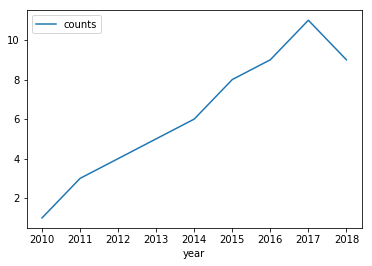

In [15]:
#Example 3: Netflix's usage of android
search_and_plot(comp = 'Netflix', keyword = 'android')

,skills,counts
year,,
2008,unix,7
2009,unix,8
2010,unix,7
2011,unix,6
2012,unix,7
2013,unix,11
2014,unix,12
2015,unix,11
2016,unix,7


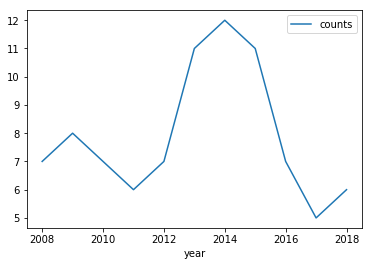

In [16]:
#Example 4: Apple's usage of unix
search_and_plot(comp = 'Apple', keyword = 'unix')

In [17]:
#Example 5: Microsoft's usage of ios
search_and_plot(comp = 'Microsoft', keyword = 'ios')

The requested keyword cannot be found in job titles from Microsoft data!
Please search from this list: 
['windows' 'research' 'sql' 'hardware' 'analytics' 'infrastructure'
 'powerpoint' 'testing' 'architecture' 'programming' 'crm' '.net'
 'virtualization' 'mac' 'access' 'outlook' 'networking' 'erp' 'excel'
 'automation' 'music' 'saas' 'sap' 'cad' 'seo' 'electronics' 'servers'
 'r&d' 'editorial' 'scrum' 'unix' 'wireless' 'r' 'algorithms' 'css'
 'visio' 'flash' 'linux' 'graphics' 'oracle' 'java' 'c#' 'ip' 'laboratory'
 'sem' 'c' 'pmp' 'android' 'animation' 'e-commerce' 'hris' 'word'
 'broadcast' 'invoicing' 'html' 'databases' 'trading' 'facebook' 'c++'
 'automotive' 'statistics' 'sdlc' 'git' 'gis' 'ccna' 'transportation'
 'instrumentation']


,skills,counts
year,,
2008,windows,248
2009,windows,254
2010,windows,285
2011,windows,268
2012,windows,293
2013,windows,258
2014,windows,183
2015,windows,122
2016,windows,112


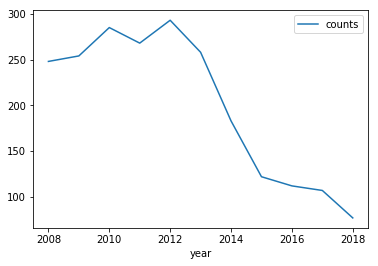

In [18]:
#Example 6: Microsoft's usage of windows
search_and_plot(comp = 'Microsoft', keyword = 'windows')

# Main function 2: plot_pie() 
### The function returns the a pie chart from a company every year.
#### It also saves the pie charts locally to ~/image folder
#### Parameters:

- comp: the company requested, from the list \['Google', 'Facebook', 'Amazon', 'Netflix', 'Microsoft', 'Apple'\]
    - default: 'Google'
- top: the number of top skills/technologies requested
    - default: 10

In [19]:
def plot_pie(comp = 'Google', top = 10):
    temp = pd.DataFrame()
    for i in range(2008, 2019):
        read = pd.read_csv('{}_2008_2018/{}_{}.csv'.format(comp, comp, i))
        df = pd.DataFrame(read['Skills'].value_counts().rename_axis('skills %d' % i).reset_index(name='counts%d' % i))
        temp = pd.concat([temp, df[:top]], axis = 1)
    #Optional: save the skillist file locally 
    #temp.to_csv('top_%d_skills.csv' % top)
    for i in range(2008, 2019):
        plt.figure(figsize=(20,15))
        ax1 = plt.subplot(221, aspect='equal')
        temp.plot(kind='pie', y = 'counts%d' % i, ax=ax1, autopct='%1.1f%%', 
                 startangle=90, shadow=False, labels=temp['skills %d' % i], legend = False, fontsize=14)
        plt.savefig('images/{}_{}_top_{}.png'.format(comp, i, top))
    return

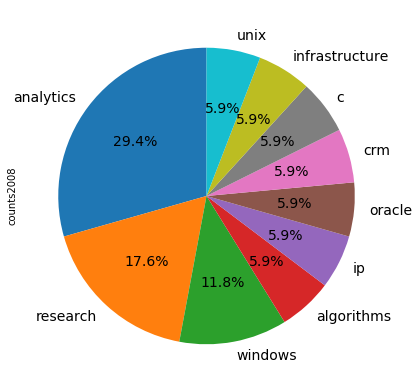

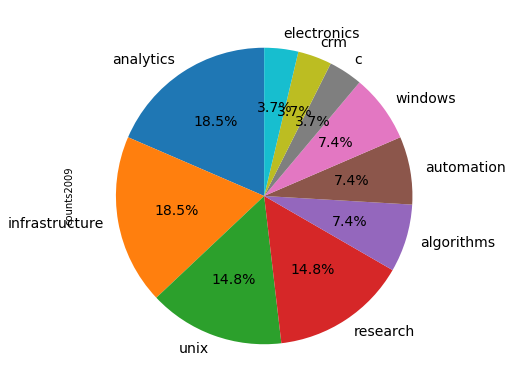

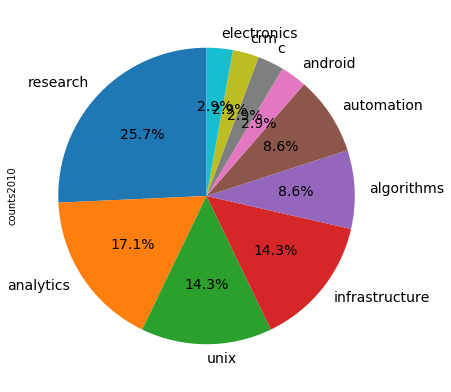

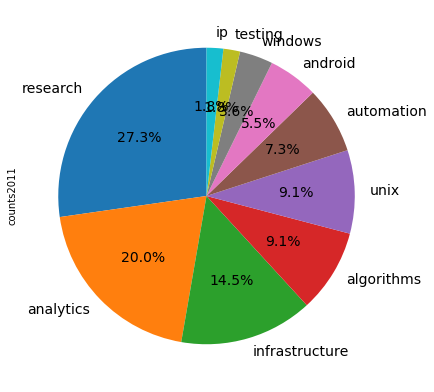

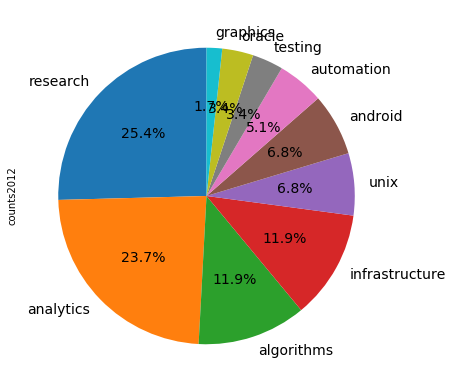

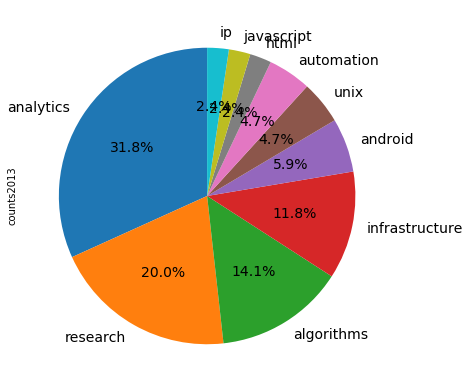

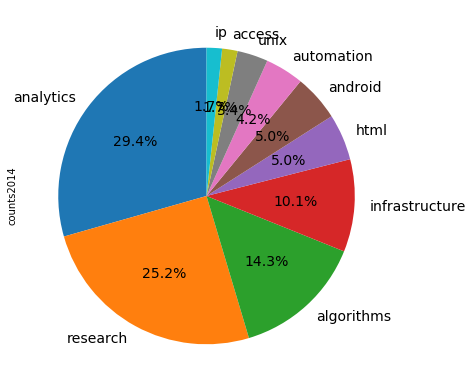

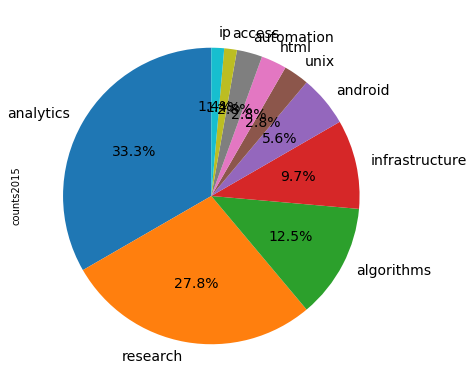

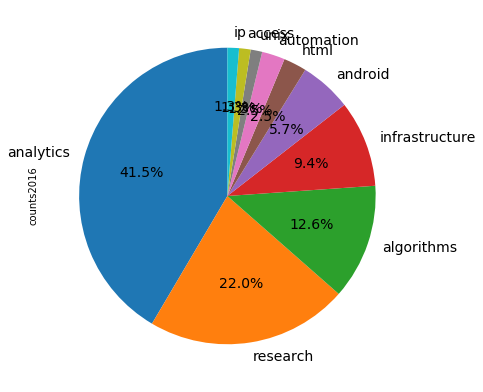

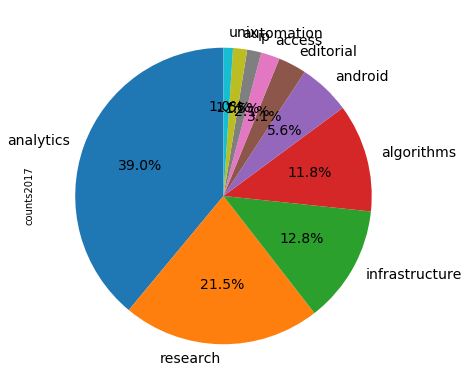

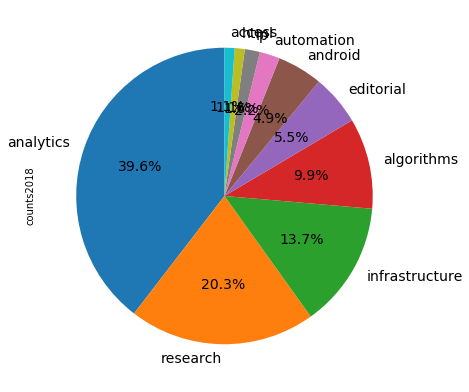

In [20]:
plot_pie(comp = 'Netflix')

# Main function 3: plot_time_series() 
### The function returns the plot about the evolution of top skills from a company
#### Parameters:

- company: the company requested, from the list \['Google', 'Facebook', 'Amazon', 'Netflix', 'Microsoft', 'Apple'\]
    - default: 'Google'
- top: the number of top skills/technologies requested
    - default: 20

In [21]:
#Helper function 1: returns the top skill list from a company
def return_skillist(comp = 'Google', top = 20):
    temp = pd.DataFrame()
    skilllist = pd.DataFrame()
    years = []
    for i in range(2008, 2019):
        read = pd.read_csv('{}_2008_2018/{}_{}.csv'.format(comp, comp, i))
        df = pd.DataFrame(read['Skills'].value_counts().rename_axis('skills').reset_index(name='counts'))
        skilllist = skilllist.append(df)
        rtn = skilllist.skills.unique()
    return rtn[:top]

#Helper function 2: returns the data from each skill
def plot_helper(keyword = 'android', comp = 'Google'):
    temp = pd.DataFrame()
    years = []
    for i in range(2008, 2019):
        read = pd.read_csv('{}_2008_2018/{}_{}.csv'.format(comp, comp, i))
        df = pd.DataFrame(read['Skills'].value_counts().rename_axis('skills').reset_index(name='%s' % keyword))
        if df.loc[df['skills'] == keyword].size == 0:
            continue
        else:
            temp = temp.append(df.loc[df['skills'] == keyword])
            years.append(i)
    temp['year'] = years
    temp = temp.set_index('year')
    return temp

#Main function: plot the evolution of top skills from a certain company
def plot_time_series(company = 'Google', num = 20):
    temp = pd.DataFrame()
    skilllist = return_skillist(comp = company, top = num)
    for skill in skilllist:
        #temp = temp.append(plot_helper(comp = company, keyword = skill))
        temp = pd.concat([temp, plot_helper(comp = company, keyword = skill)], axis = 1)
    return temp.plot()

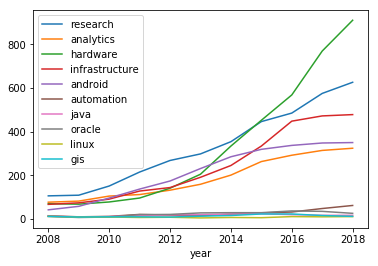

In [22]:
#Exmaple 1: Google's top 10 skills' evolution
plot_time_series(num = 10)

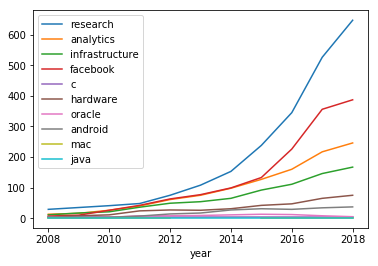

In [23]:
#Exmaple 2: Facebook's top 10 skills' evolution
plot_time_series(company = 'Facebook', num = 10)

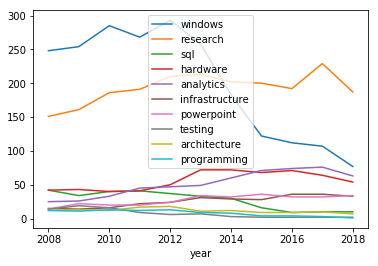

In [24]:
#Exmaple 3: Microsoft's top 10 skills' evolution
plot_time_series(company = 'Microsoft', num = 10)

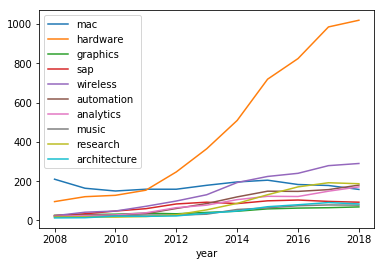

In [25]:
#Exmaple 4: Apple's top 10 skills' evolution
plot_time_series(company = 'Apple', num = 10)